In [24]:

for d,p,f in os.walk(r"..\data"):
    print(f)

allfiles = [os.path.join(root,f) for root,dirs,files in os.walk("..\data") for f in files]
for f in allfiles:
        print(f)

['Emc2.png', 'Eq1.png', 'Eq2.png', 'Eq3.png', 'Eq4.png', 'Eq5.png', 'Fourier.png', 'PaperEquation.png', 'Template_E.png']
..\data\Emc2.png
..\data\Eq1.png
..\data\Eq2.png
..\data\Eq3.png
..\data\Eq4.png
..\data\Eq5.png
..\data\Fourier.png
..\data\PaperEquation.png
..\data\Template_E.png


In [37]:
"""
Tentando utilizar busca por contornos
"""
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
from ipywidgets import interact

allfiles = [os.path.join(root,f) for root,dirs,files in os.walk("..\data") for f in files]

def contornos(x=5,y=5):
    #  Le imagem do arquivo
    img_rgb = cv2.imread(r"..\data\Eq2.png", cv2.IMREAD_COLOR)
    img_rgb = cv2.resize(img_rgb,(600,400),cv2.INTER_AREA)

    # Transforma em escala de cinza
    gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
    # Performing OTSU threshold
    ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

    # Specify structure shape and kernel size.
    # Kernel size increases or decreases the area
    # of the rectangle to be detected.
    # A smaller value like (10, 10) will detect
    # each word instead of a sentence.
    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (x, y))

    # Applying dilation on the threshold image
    dilation = cv2.dilate(thresh1, rect_kernel, iterations=1)

    # Finding contours
    contours, hierarchy = cv2.findContours(
        dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE
    )

    # Creating a copy of image
    im2 = gray.copy()

    # Looping through the identified contours
    # Then rectangular part is cropped and passed on
    # to pytesseract for extracting text from it
    # Extracted text is then written into the text file
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)

        # Drawing a rectangle on copied image
        rect = cv2.rectangle(gray, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Cropping the text block for giving input to OCR
        cropped = gray[y : y + h, x : x + w]

    plt.imshow(rect,"gray")
    plt.show()


interact(contornos, x=(1, 200), y=(1, 200))


interactive(children=(IntSlider(value=5, description='x', max=200, min=1), IntSlider(value=5, description='y',…

<function __main__.contornos(x=5, y=5)>

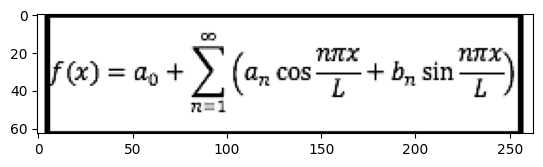

In [2]:
#  Le imagem do arquivo
img_rgb = cv2.imread(r"..\data\fourier.png", cv2.IMREAD_COLOR)

# Transforma em escala de cinza
gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
# Performing OTSU threshold
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

# Specify structure shape and kernel size.
# Kernel size increases or decreases the area
# of the rectangle to be detected.
# A smaller value like (10, 10) will detect
# each word instead of a sentence.
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (6,46))

# Applying dilation on the threshold image
dilation = cv2.dilate(thresh1, rect_kernel, iterations=1)

# Finding contours
contours, hierarchy = cv2.findContours(
    dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE
)

# Creating a copy of image
im2 = gray.copy()

# Looping through the identified contours
# Then rectangular part is cropped and passed on
# to pytesseract for extracting text from it
# Extracted text is then written into the text file
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)

    # Drawing a rectangle on copied image
    rect = cv2.rectangle(gray, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Cropping the text block for giving input to OCR
    cropped = gray[y : y + h, x : x + w]

plt.subplot(111)
plt.imshow(rect, "gray")
plt.show()